[Local](./index.ipynb),
[Github](https://github.com/renyuanL/_ryDsp2020/blob/master/code/index.ipynb),
[Colab](https://colab.research.google.com/github/renyuanL/_ryDsp2020/blob/master/code/index.ipynb),
[Youtube](https://youtu.be/CAGnf7E5kEI)

# Course: `Signals & Systems / DSP`

### Renyuan Lyu, (呂仁園)


### https://github.com/renyuanL

### 課程教材 在此

1. Google Search: `"Renyuan Lyu Github"`
2. 進入 `_ryDsp2020`
3. 打開 `index.ipynb`

或者，直接使用以下網址：
###  https://github.com/renyuanL/_ryDsp2020/blob/master/index.ipynb

----


## Text Book


- [Think DSP: Digital Signal Processing in Python](http://greenteapress.com/thinkdsp/html/index.html)
 
- by Allen Downey

![](https://images-na.ssl-images-amazon.com/images/I/418A0nrawUL._SX379_BO1,204,203,200_.jpg)


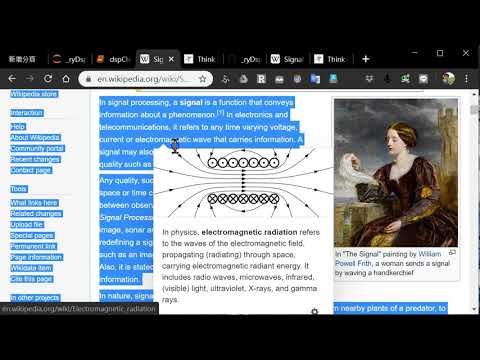

In [1]:
from IPython.display import YouTubeVideo    
YouTubeVideo("CAGnf7E5kEI")


# Contents


## Ch01. Sounds and signals

- Periodic signals
- Spectral decomposition
- Signals
- Reading and writing Waves
- Spectrums
- Wave objects
- Signal objects
- Exercises

## Ch02. Harmonics

- Triangle waves
- Square waves
- Aliasing
- Computing the spectrum
- Exercises

## Ch03. Non-periodic signals

- Linear chirp
- Exponential chirp
- Spectrum of a chirp
- Spectrogram
- The Gabor limit
- Leakage
- Windowing
- Implementing spectrograms
- Exercises

## Ch04. Noise

- Uncorrelated noise
- Integrated spectrum
- Brownian noise
- Pink Noise
- Gaussian noise
- Exercises

## Ch05. Autocorrelation

- Correlation
- Serial correlation
- Autocorrelation
- Autocorrelation of periodic signals
- Correlation as dot product
- Using NumPy
- Exercises

## Ch06. Discrete Cosine Transform

- Synthesis
- Synthesis with arrays
- Analysis
- Orthogonal matrices
- DCT-IV
- Inverse DCT
- The Dct class
- Exercises

## Ch07. Discrete Fourier Transform

- Complex exponentials
- Complex signals
- The synthesis problem
- Synthesis with matrices
- The analysis problem
- Efficient analysis
- DFT
- The DFT is periodic
- DFT of real signals
- Exercises

## Ch08. Filtering and Convolution

- Smoothing
- Convolution
- The frequency domain
- The Convolution Theorem
- Gaussian filter
- Efficient convolution
- Efficient autocorrelation
- Exercises

## Ch09. Differentiation and Integration

- Finite differences
- The frequency domain
- Differentiation
- Integration
- Cumulative sum
- Integrating noise
- Exercises

## Ch10. LTI systems

- Signals and systems
- Windows and filters
- Acoustic response
- Systems and convolution
- Proof of the Convolution Theorem
- Exercises

## Ch11. Modulation and sampling

- Convolution with impulses
- Amplitude modulation
- Sampling
- Aliasing
- Interpolation
- Summary
- Exercises


# Chapter 1  Sounds and signals

----

A signal represents a quantity that varies in time. That definition is pretty abstract, so let’s start with a concrete example: sound. Sound is variation in air pressure. A sound signal represents variations in air pressure over time.

A microphone is a device that measures these variations and generates an electrical signal that represents sound. A speaker is a device that takes an electrical signal and produces sound. Microphones and speakers are called transducers because they transduce, or convert, signals from one form to another.

This book is about signal processing, which includes processes for synthesizing, transforming, and analyzing signals. I will focus on sound signals, but the same methods apply to electronic signals, mechanical vibration, and signals in many other domains.

They also apply to signals that vary in space rather than time, like elevation along a hiking trail. And they apply to signals in more than one dimension, like an image, which you can think of as a signal that varies in two-dimensional space. Or a movie, which is a signal that varies in two-dimensional space and time.

But we start with simple one-dimensional sound.

The code for this chapter is in chap01.ipynb, which is in the repository for this book (see Section 0.2). You can also view it at http://tinyurl.com/thinkdsp01.

## 1.1  Periodic signals


![](http://greenteapress.com/thinkdsp/html/thinkdsp001.png)
Figure 1.1: Segment from a recording of a bell.

![](fg/fg_hand001.png)


We’ll start with periodic signals, which are signals that repeat themselves after some period of time. For example, if you strike a bell, it vibrates and generates sound. If you record that sound and plot the transduced signal, it looks like Figure 1.1.

This signal resembles a sinusoid, which means it has the same shape as the trigonometric sine function.

You can see that this signal is periodic. I chose the duration to show three full repetitions, also known as cycles. The duration of each cycle, called the period, is about 2.3 ms.

The frequency of a signal is the number of cycles per second, which is the inverse of the period. The units of frequency are cycles per second, or Hertz, abbreviated “Hz”. (Strictly speaking, the number of cycles is a dimensionless number, so a Hertz is really a “per second”).

The frequency of this signal is about 439 Hz, slightly lower than 440 Hz, which is the standard tuning pitch for orchestral music. The musical name of this note is A, or more specifically, A4. If you are not familiar with “scientific pitch notation”, the numerical suffix indicates which octave the note is in. A4 is the A above middle C. A5 is one octave higher. See http://en.wikipedia.org/wiki/Scientific_pitch_notation.

![](http://greenteapress.com/thinkdsp/html/thinkdsp002.png)
Figure 1.2: Segment from a recording of a violin.

A tuning fork generates a sinusoid because the vibration of the tines is a form of simple harmonic motion. Most musical instruments produce periodic signals, but the shape of these signals is not sinusoidal. For example, Figure 1.2 shows a segment from a recording of a violin playing Boccherini’s String Quintet No. 5 in E, 3rd movement.

Again we can see that the signal is periodic, but the shape of the signal is more complex. The shape of a periodic signal is called the waveform. Most musical instruments produce waveforms more complex than a sinusoid. The shape of the waveform determines the musical timbre, which is our perception of the quality of the sound. People usually perceive complex waveforms as rich, warm and more interesting than sinusoids.

----

## 1.2  Spectral decomposition

![](http://greenteapress.com/thinkdsp/html/thinkdsp003.png)
Figure 1.3: Spectrum of a segment from the violin recording.

The most important topic in this book is spectral decomposition, which is the idea that any signal can be expressed as the sum of sinusoids with different frequencies.

The most important mathematical idea in this book is the Discrete Fourier Transform, or DFT, which takes a signal and produces its spectrum. The spectrum is the set of sinusoids that add up to produce the signal.

And the most important algorithm in this book is the Fast Fourier Transform, or FFT, which is an efficient way to compute the DFT.

For example, Figure 1.3 shows the spectrum of the violin recording in Figure 1.2. The x-axis is the range of frequencies that make up the signal. The y-axis shows the strength or amplitude of each frequency component.

The lowest frequency component is called the fundamental frequency. The fundamental frequency of this signal is near 440 Hz (actually a little lower, or “flat”).

In this signal the fundamental frequency has the largest amplitude, so it is also the dominant frequency. Normally the perceived pitch of a sound is determined by the fundamental frequency, even if it is not dominant.

The other spikes in the spectrum are at frequencies 880, 1320, 1760, and 2200, which are integer multiples of the fundamental. These components are called harmonics because they are musically harmonious with the fundamental:

- 880 is the frequency of A5, one octave higher than the fundamental. An octave is a doubling in frequency.
- 1320 is approximately E6, which is a perfect fifth above A5. If you are not familiar with musical intervals like "perfect fifth”, see https://en.wikipedia.org/wiki/Interval_(music).
- 1760 is A6, two octaves above the fundamental.
- 2200 is approximately C♯7, which is a major third above A6.

These harmonics make up the notes of an A major chord, although not all in the same octave. Some of them are only approximate because the notes that make up Western music have been adjusted for equal temperament (see http://en.wikipedia.org/wiki/Equal_temperament).

Given the harmonics and their amplitudes, you can reconstruct the signal by adding up sinusoids. Next we’ll see how.

----

## 1.3  Signals

I wrote a Python module called `thinkdsp.py` that contains classes and functions for working with signals and spectrums (1). You will find it in the repository for this book (see Section 0.2).

To represent signals, thinkdsp provides a class called Signal, which is the parent class for several signal types, including Sinusoid, which represents both sine and cosine signals.

thinkdsp provides functions to create sine and cosine signals:

    cos_sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
    sin_sig = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)
    
freq is frequency in Hz. amp is amplitude in unspecified units where 1.0 is defined as the largest amplitude we can record or play back.

offset is a phase offset in radians. Phase offset determines where in the period the signal starts. For example, a sine signal with offset=0 starts at sin0, which is 0. With offset=pi/2 it starts at sinπ/2, which is 1.

Signals have an __add__ method, so you can use the + operator to add them:

    mix = sin_sig + cos_sig
    
The result is a SumSignal, which represents the sum of two or more signals.

A Signal is basically a Python representation of a mathematical function. Most signals are defined for all values of t, from negative infinity to infinity.

You can’t do much with a Signal until you evaluate it. In this context, “evaluate” means taking a sequence of points in time, ts, and computing the corresponding values of the signal, ys. I represent ts and ys using NumPy arrays and encapsulate them in an object called a Wave.

A Wave represents a signal evaluated at a sequence of points in time. Each point in time is called a frame (a term borrowed from movies and video). The measurement itself is called a sample, although “frame” and “sample” are sometimes used interchangeably.

Signal provides make_wave, which returns a new Wave object:

    wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
    
duration is the length of the Wave in seconds. start is the start time, also in seconds. framerate is the (integer) number of frames per second, which is also the number of samples per second.

11,025 frames per second is one of several framerates commonly used in audio file formats, including Waveform Audio File (WAV) and mp3.

This example evaluates the signal from t=0 to t=0.5 at 5,513 equally-spaced frames (because 5,513 is half of 11,025). The time between frames, or timestep, is 1/11025 seconds, about 91 µs.

Wave provides a plot method that uses pyplot. You can plot the wave like this:

    wave.plot()
    pyplot.show()
    
pyplot is part of matplotlib; it is included in many Python distributions, or you might have to install it.

![](http://greenteapress.com/thinkdsp/html/thinkdsp004.png)
Figure 1.4: Segment from a mixture of two sinusoid signals.

At freq=440 there are 220 periods in 0.5 seconds, so this plot would look like a solid block of color. To zoom in on a small number of periods, we can use segment, which copies a segment of a Wave and returns a new wave:

    period = mix.period
    segment = wave.segment(start=0, duration=period*3)
    
period is a property of a Signal; it returns the period in seconds.

start and duration are in seconds. This example copies the first three periods from mix. The result is a Wave object.

If we plot segment, it looks like Figure 1.4. This signal contains two frequency components, so it is more complicated than the signal from the tuning fork, but less complicated than the violin.

----

## 1.4  Reading and writing Waves


thinkdsp provides read_wave, which reads a WAV file and returns a Wave:

    violin_wave = thinkdsp.read_wave('input.wav')
And Wave provides write, which writes a WAV file:

    wave.write(filename='output.wav')
You can listen to the Wave with any media player that plays WAV files. On UNIX systems, I use aplay, which is simple, robust, and included in many Linux distributions.

thinkdsp also provides play_wave, which runs the media player as a subprocess:

    thinkdsp.play_wave(filename='output.wav', player='aplay')
It uses aplay by default, but you can provide the name of another player.

----

## 1.5  Spectrums


Wave provides make_spectrum, which returns a Spectrum:

    spectrum = wave.make_spectrum()
And Spectrum provides plot:

    spectrum.plot()
    thinkplot.show()
thinkplot is a module I wrote to provide wrappers around some of the functions in pyplot. It is included in the Git repository for this book (see Section 0.2).

Spectrum provides three methods that modify the spectrum:

low_pass applies a low-pass filter, which means that components above a given cutoff frequency are attenuated (that is, reduced in magnitude) by a factor.
high_pass applies a high-pass filter, which means that it attenuates components below the cutoff.
band_stop attenuates components in the band of frequencies between two cutoffs.
This example attenuates all frequencies above 600 by 99%:

   spectrum.low_pass(cutoff=600, factor=0.01)
A low-pass filter removes bright, high-frequency sounds, so the result sounds muffled and darker. To hear what it sounds like, you can convert the Spectrum back to a Wave, and then play it.

    wave = spectrum.make_wave()
    wave.play('temp.wav')
The play method writes the wave to a file and then plays it. If you use Jupyter notebooks, you can use make_audio, which makes an Audio widget that plays the sound.

----

## 1.6  Wave objects

![](http://greenteapress.com/thinkdsp/html/thinkdsp005.png)
Figure 1.5: Relationships among the classes in thinkdsp.

There is nothing very complicated in thinkdsp.py. Most of the functions it provides are thin wrappers around functions from NumPy and SciPy.

The primary classes in thinkdsp are Signal, Wave, and Spectrum. Given a Signal, you can make a Wave. Given a Wave, you can make a Spectrum, and vice versa. These relationships are shown in Figure 1.5.

A Wave object contains three attributes: ys is a NumPy array that contains the values in the signal; ts is an array of the times where the signal was evaluated or sampled; and framerate is the number of samples per unit of time. The unit of time is usually seconds, but it doesn’t have to be. In one of my examples, it’s days.

Wave also provides three read-only properties: start, end, and duration. If you modify ts, these properties change accordingly.

To modify a wave, you can access the ts and ys directly. For example:

wave.ys *= 2
wave.ts += 1
The first line scales the wave by a factor of 2, making it louder. The second line shifts the wave in time, making it start 1 second later.

But Wave provides methods that perform many common operations. For example, the same two transformations could be written:

wave.scale(2)
wave.shift(1)
You can read the documentation of these methods and others at http://greenteapress.com/thinkdsp.html.

----

## 1.7  Signal objects

Signal is a parent class that provides functions common to all kinds of signals, like make_wave. Child classes inherit these methods and provide evaluate, which evaluates the signal at a given sequence of times.

For example, Sinusoid is a child class of Signal, with this definition:

class Sinusoid(Signal):
    
    def __init__(self, freq=440, amp=1.0, offset=0, func=np.sin):
        Signal.__init__(self)
        self.freq = freq
        self.amp = amp
        self.offset = offset
        self.func = func
The parameters of __init__ are:

freq: frequency in cycles per second, or Hz.
amp: amplitude. The units of amplitude are arbitrary, usually chosen so 1.0 corresponds to the maximum input from a microphone or maximum output to a speaker.
offset: indicates where in its period the signal starts; offset is in units of radians, for reasons I explain below.
func: a Python function used to evaluate the signal at a particular point in time. It is usually either np.sin or np.cos, yielding a sine or cosine signal.
Like many init methods, this one just tucks the parameters away for future use.

Signal provides make_wave, which looks like this:

    def make_wave(self, duration=1, start=0, framerate=11025):
        n = round(duration * framerate)
        ts = start + np.arange(n) / framerate
        ys = self.evaluate(ts)
        return Wave(ys, ts, framerate=framerate)
start and duration are the start time and duration in seconds. framerate is the number of frames (samples) per second.

n is the number of samples, and ts is a NumPy array of sample times.

To compute the ys, make_wave invokes evaluate, which is provided by Sinusoid:

    def evaluate(self, ts):
        phases = PI2 * self.freq * ts + self.offset
        ys = self.amp * self.func(phases)
        return ys
Let’s unwind this function one step at time:

self.freq is frequency in cycles per second, and each element of ts is a time in seconds, so their product is the number of cycles since the start time.
PI2 is a constant that stores 2 π. Multiplying by PI2 converts from cycles to phase. You can think of phase as “cycles since the start time” expressed in radians. Each cycle is 2 π radians.
self.offset is the phase when t=0. It has the effect of shifting the signal left or right in time.
If self.func is np.sin or np.cos, the result is a value between −1 and +1.
Multiplying by self.amp yields a signal that ranges from -self.amp to +self.amp.
In math notation, evaluate is written like this:

y = A cos(2 π f t + φ0) 
where A is amplitude, f is frequency, t is time, and φ0 is the phase offset. It may seem like I wrote a lot of code to evaluate one simple expression, but as we’ll see, this code provides a framework for dealing with all kinds of signals, not just sinusoids.

----

## 1.8  Exercises

Before you begin these exercises, you should download the code for this book, following the instructions in Section 0.2.

Solutions to these exercises are in chap01soln.ipynb.

Exercise 1   

If you have Jupyter, load chap01.ipynb, read through it, and run the examples. You can also view this notebook at http://tinyurl.com/thinkdsp01.

Exercise 2   

Go to http://freesound.org and download a sound sample that includes music, speech, or other sounds that have a well-defined pitch. Select a roughly half-second segment where the pitch is constant. Compute and plot the spectrum of the segment you selected. What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum?
Use high_pass, low_pass, and band_stop to filter out some of the harmonics. Then convert the spectrum back to a wave and listen to it. How does the sound relate to the changes you made in the spectrum?

Exercise 3   

Synthesize a compound signal by creating SinSignal and CosSignal objects and adding them up. Evaluate the signal to get a Wave, and listen to it. Compute its Spectrum and plot it. What happens if you add frequency components that are not multiples of the fundamental?

Exercise 4   

Write a function called stretch that takes a Wave and a stretch factor and speeds up or slows down the wave by modifying ts and framerate. Hint: it should only take two lines of code.

----